**Gradyan Yükseltme Makineleri Regresyon Modeli**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [2]:
df = pd.read_csv("./dataset01.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division','NewLeague']])
y = df["Salary"]
X_ = df.drop (['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)

**Model & Tahmin İşlemleri**

In [3]:
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)

In [4]:
gbm_model

GradientBoostingRegressor()

In [5]:
y_pred = gbm_model.predict(X_test)

In [6]:
np.sqrt(mean_squared_error(y_test, y_pred))

351.5425040763159

**Model Tuning**

In [8]:
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)
gbm_model

GradientBoostingRegressor()

In [9]:
?gbm_model

Type:        GradientBoostingRegressor
String form: GradientBoostingRegressor()
Length:      100
File:        ~/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_gb.py
Docstring:  
Gradient Boosting for regression.

This estimator builds an additive model in a forward stage-wise fashion; it
allows for the optimization of arbitrary differentiable loss functions. In
each stage a regression tree is fit on the negative gradient of the given
loss function.

:class:`sklearn.ensemble.HistGradientBoostingRegressor` is a much faster
variant of this algorithm for intermediate datasets (`n_samples >= 10_000`).

Read more in the :ref:`User Guide <gradient_boosting>`.

Parameters
----------
loss : {'squared_error', 'absolute_error', 'huber', 'quantile'},             default='squared_error'
    Loss function to be optimized. 'squared_error' refers to the squared
    error for regression. 'absolute_error' refers to the absolute error of
    regression and is a robust loss function. 'huber' is 

In [50]:
gbm_params = {"learning_rate": [0.001,0.1,0.01],
            "max_depth": [3,5,8],
            "n_estimators": [100,200,500],
            "subsample": [1,0.5,0.8]}

In [51]:
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)

In [52]:
gbm_cv_model = GridSearchCV(gbm_model, gbm_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits
[CV] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=1; total time=   0.0s
[CV] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=200, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=200, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.001, loss=ls, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.001, loss=ls, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV

In [53]:
gbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}

In [54]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.1,
                                     max_depth = 3,
                                     n_estimators = 100,
                                     subsample = 0.5).fit(X_train, y_train)

In [55]:
y_pred = gbm_tuned.predict(X_test)

In [56]:
np.sqrt(mean_squared_error(y_test, y_pred))

339.50179771754637

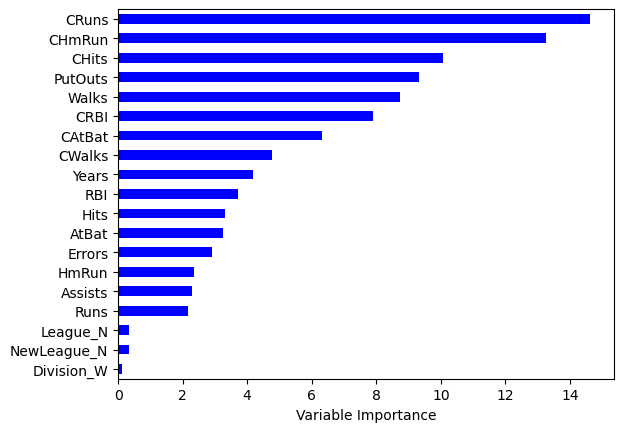

[CV] END learning_rate=0.01, loss=lad, max_depth=8, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, loss=lad, max_depth=8, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, loss=lad, max_depth=8, n_estimators=200, subsample=1; total time=   0.0s
[CV] END learning_rate=0.01, loss=lad, max_depth=8, n_estimators=200, subsample=1; total time=   0.0s
[CV] END learning_rate=0.01, loss=lad, max_depth=8, n_estimators=200, subsample=1; total time=   0.0s
[CV] END learning_rate=0.01, loss=lad, max_depth=8, n_estimators=200, subsample=1; total time=   0.0s
[CV] END learning_rate=0.01, loss=lad, max_depth=8, n_estimators=200, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.01, loss=lad, max_depth=8, n_estimators=200, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.01, loss=lad, max_depth=8, n_estimators=200, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.01, loss=lad, max_depth=8, n_estimators=200, su

In [57]:
Importance = pd.DataFrame({'Importance': gbm_tuned.feature_importances_*100},
                         index = X_train.columns)
Importance.sort_values(by = 'Importance',
                      axis = 0,
                      ascending = True).plot(kind = 'barh',
                                            color = 'b')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None